<a href="https://colab.research.google.com/github/Ibrahimak555/Machine-Learning-Projects/blob/main/CatDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 195MB/s]
100% 1.06G/1.06G [00:05<00:00, 203MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.1239 - accuracy: 0.6049 - val_loss: 0.5858 - val_accuracy: 0.6958
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5517 - accuracy: 0.7196 - val_loss: 0.5104 - val_accuracy: 0.7556
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4686 - accuracy: 0.7814 - val_loss: 0.4573 - val_accuracy: 0.7846
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4058 - accuracy: 0.8166 - val_loss: 0.5870 - val_accuracy: 0.7186
Epoch 5/10
625/625 [==============================] - 71s 112ms/step - loss: 0.3397 - accuracy: 0.8528 - val_loss: 0.4661 - val_accuracy: 0.7886
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2783 - accuracy: 0.8827 - val_loss: 0.4696 - val_accuracy: 0.8176
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1920 - accuracy: 0.9231 - val_loss: 0.5498 - val_ac

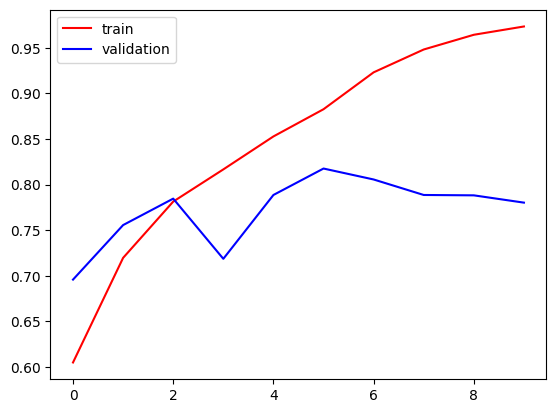

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

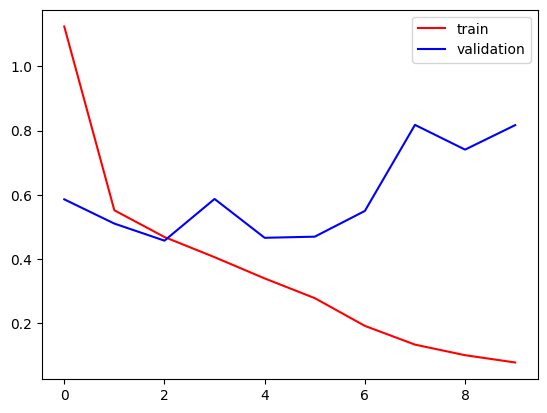

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
import cv2

test_cat = cv2.imread('/content/Cat.jpg')
test_dog = cv2.imread('/content/Dog.jpg')

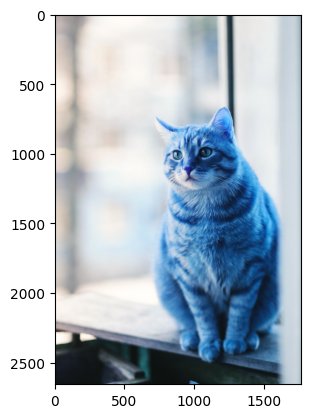

In [20]:
plt.imshow(test_cat)

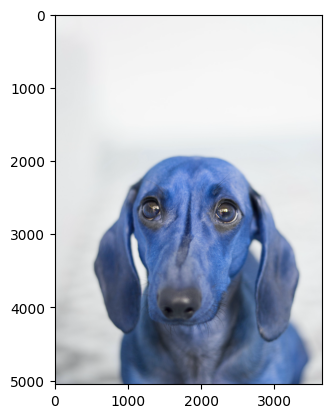

In [27]:
plt.imshow(test_dog)

In [28]:
test_cat = cv2.resize(test_cat,(256,256))
test_dog = cv2.resize(test_dog,(256,256))

In [29]:
test_input_cat = test_cat.reshape((1,256,256,3))
test_input_dog = test_dog.reshape((1,256,256,3))

In [30]:
model.predict(test_input_cat)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [31]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 17ms/step


array([[1.5683452e-35]], dtype=float32)